<a href="https://colab.research.google.com/github/usintec/CaliforniaHousingRegression/blob/master/notebooks/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Linear Regression Analysis of California Housing Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the California Housing Dataset

This section of the analysis involves loading the California Housing dataset, which is publicly available and commonly used for regression analysis in machine learning. The dataset comprises various features reflective of the socio-economic and geographic information of districts in California, as recorded by the 1990 U.S. census.


In [2]:
# Load the California housing dataset
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = pd.Series(housing.target)

# Display the first few rows of the dataset
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Defining Features and Target, and Splitting the Dataset

### Feature and Target Definition

The dataset is organized into features and a target variable for the purpose of predictive modeling. The features encompass a range of socio-economic, demographic, and geographic attributes, while the target variable is the median house value for each district. This setup facilitates the exploration of how various factors influence house prices in California.

### Data Splitting

To assess the effectiveness of the predictive model, the dataset is divided into training and testing subsets. The training set is used to build and tune the model, whereas the testing set serves to evaluate its predictive performance. This split helps in validating the accuracy and robustness of the model against new, unseen data.

In [3]:
# Define the features and the target
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

In preparation for modeling, we first need to segregate the predictors (features) and the outcome (target) variables. The target variable is the median house value (`MedHouseVal`), which we aim to predict using the remaining columns as features.


In the code above:
- `X` represents the matrix of features, which includes all columns except `MedHouseVal`.
- `y` is the target variable series, representing the median house values for each district.


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In this step:
- We use `train_test_split` from `sklearn.model_selection` to divide the data.
- `test_size=0.2` indicates that 20% of the data is reserved for testing.
- `random_state=42` ensures reproducibility of the results by providing a fixed seed for the random number generator used in the split.

By splitting the data, we ensure that our model is tested on different data than it was trained on, which helps in assessing its generalization ability to new, unseen data.

## Model Initialization and Training

### Model Initialization

A Linear Regression model is initialized to predict the median house values based on various input features. This model assumes a linear relationship between the target variable and the predictors.

### Model Training

Once initialized, the model is trained using the designated training dataset. This process involves adjusting the model parameters to minimize the error between the predicted and actual house values in the training data, thereby optimizing the model’s ability to make accurate predictions.

In [5]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

## Making Predictions and Evaluating the Model

### Predicting House Values

After training, the model is used to predict house values for the test dataset. This step is crucial as it provides an estimation of how the model will perform in real-world scenarios or when exposed to new data not seen during the training phase.

### Model Evaluation Metrics

To assess the accuracy of the predictions, two key metrics are calculated:

- **Mean Squared Error (MSE):** This metric represents the average squared difference between the actual and predicted house values. It offers a measure of the model's prediction error, with lower values indicating better accuracy.
- **Coefficient of Determination (R² Score):** This statistic provides an indication of the goodness of fit of the model. It is a scale-free score that measures how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model. An R² score of 1 indicates perfect prediction, while a score closer to 0 suggests the model fails to accurately model the target variable.

### Visualization of Predictions

Visual representation of the actual vs. predicted values is created using a scatter plot, which helps in visually assessing the performance of the regression model. Points along the diagonal line represent accurate predictions, while deviations from this line indicate discrepancies between the actual and predicted values.

- **Scatter Plot:** Displays actual values against predicted values, providing a visual assessment of how well the predictions match the true values.
- **Line of Perfect Prediction:** A reference line (colored red in the plot) is drawn where the actual values equal the predicted values, serving as a benchmark for perfect prediction.

This visual analysis, alongside the quantitative metrics, offers a comprehensive overview of the model's performance, highlighting areas where the model excels or where improvements are needed.

Mean Squared Error: 0.56
R^2 Score: 0.58


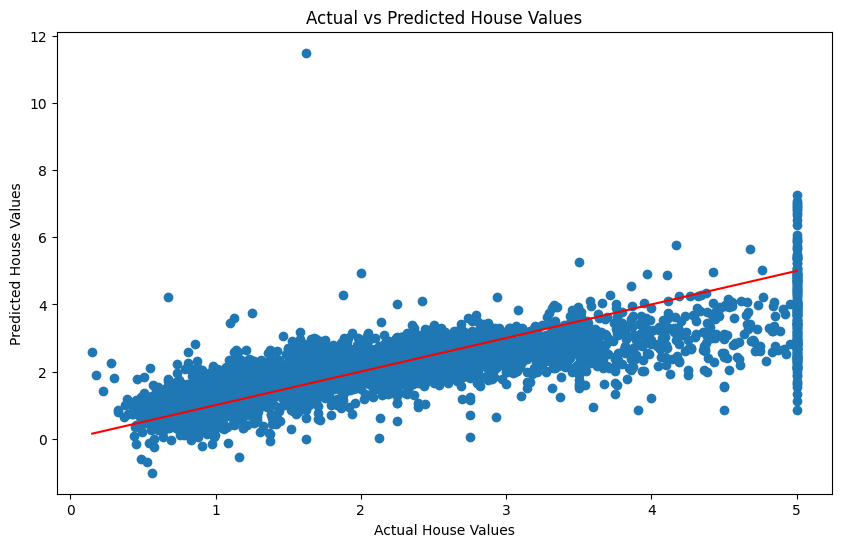

In [6]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error and the coefficient of determination (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Line showing perfect predictions
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('Actual vs Predicted House Values')
plt.show()

This scatter plot illustrates the relationship between the actual house values (x-axis) and the predicted house values (y-axis) derived from our linear regression model. This visual representation is pivotal for assessing the model’s predictive accuracy and identifying any potential patterns or anomalies in the predictions.

### Key Observations:

- **Red Line:** Represents the line of perfect prediction. If all predictions were perfect, each point would lie on this line where the predicted value exactly equals the actual value.
- **Data Spread:** Most of the data points are clustered around the lower range of house values, suggesting that the model is relatively more accurate at predicting lower house values. As the actual values increase, the predictions tend to deviate more from the line of perfect prediction.
- **Vertical Data Points:** The vertical line of points at an actual value of 5 indicates a potential issue with data capping at this value. It suggests that the maximum recorded value for house prices in the dataset is capped at 5, which might influence the model's ability to predict higher values accurately.

### Quantitative Metrics:

- **Mean Squared Error (MSE):** Calculated as 0.56, this metric quantifies the average squared difference between the predicted and actual values. A lower MSE would be indicative of a more accurate model.
- **R² Score:** At 0.58, this metric tells us that approximately 58% of the variance in the target variable is explained by the features used in the model. This score is a measure of how well the observed outcomes are replicated by the model, where a score of 1 would denote perfect prediction.

### Implications:

The graph and accompanying metrics highlight areas where the model performs well and where improvements might be needed. The discrepancies observed, particularly at higher value ranges, could prompt further investigation into model enhancements, additional feature engineering, or the application of different modeling techniques to improve accuracy.

This analysis forms a foundational part of understanding the model’s performance and guides subsequent steps towards refining predictive capabilities.

In [7]:
# Display the coefficients of the linear model
feature_importance = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)
print(feature_importance)

            Coefficient
AveBedrms      0.783145
MedInc         0.448675
HouseAge       0.009724
Population    -0.000002
AveOccup      -0.003526
AveRooms      -0.123323
Latitude      -0.419792
Longitude     -0.433708


In [8]:
intercept = model.intercept_
print("Intercept:", intercept)

Intercept: -37.02327770606409


With the intercept provided, we can now fully construct the equation for predicting the median house value based on the coefficients of your linear regression model. Here is the completed equation:

### Completed Equation:
MedHouseVal= (0.7831)AveBedrms + (0.4867)MedInc + (0.0097)HouseAge − (0.0000)Population − (0.0035)AveOccup − (0.1233)AveRooms − (0.4198)Latitude − (0.4377)Longitude − 37.0233

### Usage:
This equation can be used to predict the median house value by plugging in values for each of the variables. It is essential to use the same scale of measurement as the original data used to train the model. If you scaled your data before training, you would need to scale your input features in the same way before making predictions.